In [61]:
import sqlite3
from datetime import timedelta, datetime, date
import pandas as pd

In [2]:
database_file = "variable_history.sqlite3"
conn = sqlite3.connect(database_file)

In [9]:
crsr = conn.cursor()

In [10]:
current_time = datetime.now().replace(microsecond=0, second=0)#, minute=0)
added_time = current_time + timedelta(minutes=1)  

In [ ]:
crsr.execute(f"DELETE FROM '2_10004' WHERE SourceTimestamp < '{added_time}';")

In [48]:
data = pd.read_sql_query("SELECT Count(Value),strftime ('%M',SourceTimestamp) Minute FROM '2_10004' bv GROUP BY strftime ('%M',SourceTimestamp)  ORDER BY _Id ASC", conn)

In [65]:
daysa = date.today()
print(daysa)
data = pd.read_sql_query(f"SELECT Value,SourceTimestamp FROM '2_10004' WHERE SourceTimestamp BETWEEN '{daysa} 09:00:00' AND '{daysa} 10:00:00'", conn)
print(data)

2021-09-13
     Value             SourceTimestamp
0     1934  2021-09-13 09:00:00.493194
1     1935  2021-09-13 09:00:00.821566
2     1936  2021-09-13 09:00:01.147459
3     1937  2021-09-13 09:00:01.582358
4     1938  2021-09-13 09:00:01.893703
...    ...                         ...
2912  4846  2021-09-13 09:21:21.162131
2913  4847  2021-09-13 09:21:21.491852
2914  4848  2021-09-13 09:21:22.371178
2915  4849  2021-09-13 09:21:22.868086
2916  4850  2021-09-13 09:21:23.084819

[2917 rows x 2 columns]


<AxesSubplot:>

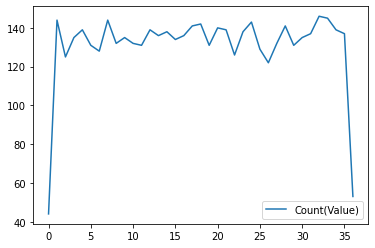

In [49]:
data.plot()

In [21]:
conn.close()